#### Import libs & load data

In [48]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

case_study = pd.read_csv('./case_study_data.csv')
case_study

,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,feature_10,feature_11,feature_12,feature_13,feature_14,feature_15,target,cat_feature_1,cat_feature_2
0,28.767169,161.966498,81.872549,99.835205,269.739988,203.647127,249.435960,117.578044,127.856154,111.061091,126.024153,177.980983,152.021918,319.135333,140.016792,112.977020,High,Category_A
1,218.938143,119.791942,167.343711,193.325205,-79.015534,53.199300,146.831591,122.634255,73.221506,79.423254,110.618714,-23.065378,133.769639,273.784216,60.854829,105.844625,Low,Category_A
2,73.635323,221.318585,99.913021,-22.305286,228.404987,111.664161,257.811522,59.378286,61.426489,86.798618,45.785137,78.697077,196.370792,-2.577077,-22.645914,93.708970,Low,Category_B
3,254.599403,9.245377,151.656239,93.377091,-31.668459,92.511416,198.598885,66.328654,232.164797,215.983485,192.334588,266.697438,147.023177,170.750747,105.240839,115.455498,Low,Category_A
4,290.040861,161.374547,70.177088,74.350879,230.188671,230.777534,251.258058,183.337692,240.107252,278.940438,183.484400,137.560854,169.524114,172.233807,0.996204,187.083308,High,Category_C
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,5.137600,223.650110,262.706014,34.115822,56.149873,203.199104,23.526109,10.265990,125.915993,174.469443,206.620790,8.447183,8.799652,62.261204,199.040973,111.933168,Low,Category_A
99996,-24.785508,54.086621,253.093477,140.302047,66.938113,113.096096,79.655440,112.177999,35.849802,187.404075,-29.669458,-29.467787,151.939305,111.344186,-19.787619,98.208574,Low,Category_A
99997,95.691137,-60.539674,182.792261,124.955195,129.011832,73.903342,72.483219,72.410532,223.346991,118.818122,-40.974059,5.113943,63.857116,142.451584,230.030930,102.714185,High,Category_A
99998,-15.557983,212.114566,-33.215685,108.988587,211.905884,291.579619,353.093819,149.118057,-23.918542,19.985540,-129.389272,154.531081,175.965241,108.808665,272.826414,91.244749,Low,Category_A


### Find the feature with the highest correlation to the target variable


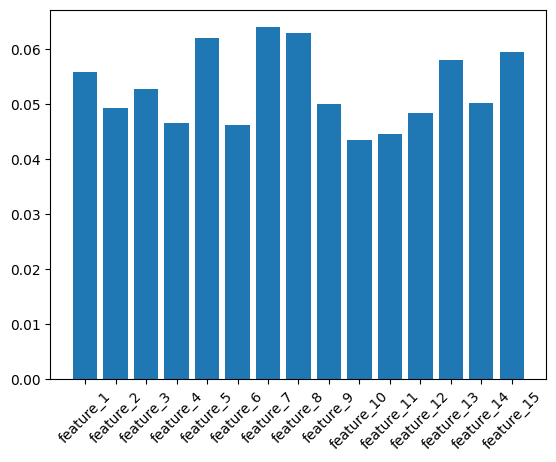

Highest correlated feature to the target variable is feature_7


In [257]:

# setup X, y & feature column names
col_names_to_drop = ["target", "cat_feature_1", "cat_feature_2"]
X = case_study.drop(col_names_to_drop, axis=1).values
y = case_study['target'].values
ft_col_names = case_study.drop(col_names_to_drop, axis=1).columns


# use Lasso regression as this will shrink coefficients of less important features
from sklearn.linear_model import Lasso
correlation_model = Lasso(alpha=0.1)
coefficients = correlation_model.fit(X,y).coef_


plt.bar(ft_col_names, coefficients)
plt.xticks(rotation=45)
plt.show()

# find index of the highest correlated feature
max_index = np.argmax(np.abs(coefficients))
print('Highest correlated feature to the target variable is {}'.format(ft_col_names[max_index]))

### What is the category in cat_feature_2 with the highest mean for the target variable?

In [68]:
case_study.groupby('cat_feature_2')['target'].mean().idxmax()

'Category_C'

### What is the absolute difference of the standard deviation of the target variable for the 2 categories in cat_feature_1?

In [78]:
high_std = case_study.groupby('cat_feature_1')['target'].std()['High']
low_std = case_study.groupby('cat_feature_1')['target'].std()['Low']
np.abs(high_std - low_std)

np.float64(0.877185200149718)

### What is the min value of feature_8 for the group category C in cat_feature_2?

In [82]:
case_study.groupby('cat_feature_2')['feature_8'].min()['Category_C']

np.float64(-255.53508400442365)

### What is the variance of feature_12 for the group where cat_feature_2 is Category_A and cat_feature_1 is High?

In [106]:
var_df = case_study.groupby(['cat_feature_1', 'cat_feature_2'])[['feature_12']].var()
var_df

feature_12
cat_feature_1 cat_feature_2              
High          Category_A     11267.178830
              Category_B     11163.965640
              Category_C     10275.529924
Low           Category_A     10222.853001
              Category_B     11098.937647
              Category_C     11101.869845

In [136]:
var_df.loc[('High', 'Category_A'), 'feature_12']

np.float64(11267.178830175519)

### Build LinearRegression model

In [161]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import root_mean_squared_error

#### Preprocessing

In [350]:
x = case_study.drop(['target'], axis=1)
y = case_study['target']

# split train & test data
X_train, X_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=42)

#### Calculate the predictions

In [351]:
x_features = case_study.drop(['target', 'cat_feature_1', 'cat_feature_2'], axis=1)
y_features = case_study['target'].values

X_train, X_test, y_train, y_test = train_test_split(x_features, y_features, test_size=0.2, random_state=42)

lin_reg_model = LinearRegression()
lin_reg_model.fit(X_train, y_train)
predictions = lin_reg_model.predict(X_test)
print('Predictions are \n {} '.format(predictions))

## TODO fix me

Predictions are 
 [185.573076    90.76037979 131.18309459 ...  96.13511802 117.44276573
 168.57756127] 


#### Calculate RMSE scores

In [352]:
rmse = root_mean_squared_error(y_test, predictions)
print('RMSE score {}'.format(rmse))

## TODO fix me

RMSE score 23.08942785401233


#### Visualize predictions on a scatter plot

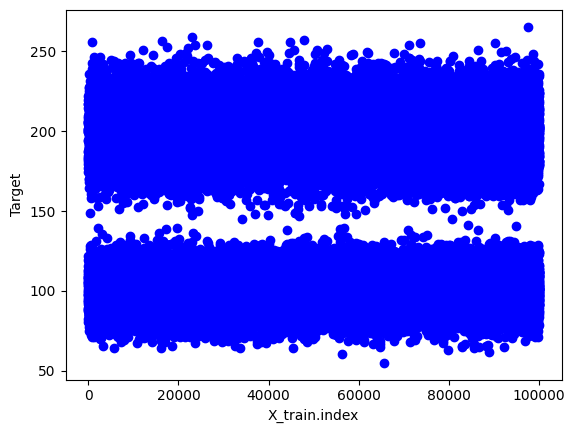

In [353]:
plt.scatter(X_train.index, y_train, color="blue")
# plt.plot(X_test.index, predictions, color="red")
plt.xlabel("X_train.index")
plt.ylabel("Target")
plt.show()

#### Scale continuous values using StandardScaler

In [357]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

reg_mod = LinearRegression()
reg_mod.fit(X_train, y_train)
predictions = reg_mod.predict(X_test)
pd.Series(predictions)

0        185.634744
1         90.963159
2        131.382083
3        186.488881
4        125.165736
            ...    
19995    102.331037
19996    142.150588
19997     96.176771
19998    117.592386
19999    168.678335
Length: 20000, dtype: float64

#### Plot predictions

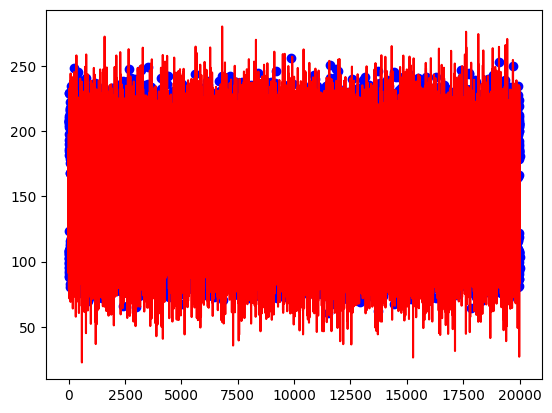

In [374]:
# plt.scatter(X_test, y_test, color="blue", alpha=0.1)
# plt.plot(X_test, predictions, color="red")
s = pd.DataFrame(X_test)
plt.scatter(s.index, y_test, color="blue")
plt.plot(s.index, predictions, color="red")